# 라이브러리 load

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data load
[데이터 링크](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

In [138]:
df = pd.read_csv("/Users/jahyeon_gu/Downloads/Hotel Reservations.csv.zip")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# About Data
1. `Booking_ID`: unique identifier of each booking
2. `noofadults`: Number of adults
3. `noofchildren`: Number of Children
4. `noofweekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
5. `noofweek_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
6. `typeofmeal_plan`: Type of meal plan booked by the customer
7. `requiredcarparking_space`: Does the customer require a car parking space? (0 - No, 1- Yes)
8. `roomtypereserved`: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
9. `lead_time`: Number of days between the date of booking and the arrival date
10. `arrival_year`: Year of arrival date
11. `arrival_month`: Month of arrival date
12. `arrival_date`: Date of the month
13. `marketsegmenttype`: Market segment designation.
14. `repeated_guest`: Is the customer a repeated guest? (0 - No, 1- Yes)
15. `noofprevious_cancellations`: Number of previous bookings that were canceled by the customer prior to the current booking
16. `noofpreviousbookingsnot_canceled`: Number of previous bookings not canceled by the customer prior to the current booking
17. `avgpriceper_room`: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
18. `noofspecial_requests`: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
19. `booking_status`: Flag indicating if the booking was canceled or not.

0. 고유 예약 번호
1. 예약 어른 인원
2. 예약 애들 인원
3. 예약 날짜 중 주말 수
4. 예약 날짜 중 평일 수 
5. 예약 식사 유형
6. 예약 주차 공간
7. 예약된 객실 유형
8. 입실 날짜 - 예약 날짜
9. 입실 연도
10. 입실 월
11. 입실 날짜
12. Market segment designation?????
13. 이전 방문 고객여부 (0, no), (1, yes)
14. 예약 취소 횟수
15. 예약 이행 횟수
16. 하루 평균 가격
17. 고객 요구사항 개수
18. 예약 상태

## 알 수 있는 점
* 데이터 타입
* 결측치 없음

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# 알아낼 수 있을거 같은 것?
* 애들이 있냐 없냐에 따라
  * 요구사항이 많은지
  * 예약을 미리미리 하는지
  * 취소율이 얼마나 나오는지
  * 재방문율이 어떻게 되는지
* market_segment_type 에 따라
  * 1박 가격에 차이가 있는지 (회사에서 비용처리 해준다면 더 비싸게 보낼 듯)
* 날짜따라 market_segment_type 별 지출하는 비용 추이
  * 박 * 평균 비용 곱해서 파생변수 셍성

In [140]:
# 주차 자리는 최대 1대를 요구
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [141]:
# 예약 번호는 고유 값 -> 당연
# 호텔에서 제공하는 음식 타입 종류 -> 4가지
# 호텔에서 제공하는 객실 종류 -> 7가지
df.describe(include="O")

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


# market_segment_type
* 무슨 데이터인지 모르겠음 -> 알아보기 -> 모르겠다

In [142]:
# 고유값 종류
df["market_segment_type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [143]:
{'Offline':"오프라인", 'Online':"온라인", 'Corporate':"기업의", 'Aviation':"항공", 'Complementary': "상호 보완적인"}

{'Offline': '오프라인',
 'Online': '온라인',
 'Corporate': '기업의',
 'Aviation': '항공',
 'Complementary': '상호 보완적인'}

In [144]:
df["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

# 파생변수 생성

## family
* family column 생성
* 어린이가 있으면 True, 아니면 False

In [145]:
df["family"] = [True if val > 0 else False for val in df["no_of_children"]]

In [146]:
df[["no_of_children", "family"]].sample(10)

,no_of_children,family
27911,0,False
23837,0,False
18793,0,False
23259,0,False
7184,0,False
19559,2,True
25556,0,False
25375,0,False
17337,0,False
15487,0,False


# all_nights
* no_of_weekend_nights + no_of_week_nights : 총 숙박일

In [147]:
df["all_nights"] = df["no_of_weekend_nights"] + df["no_of_week_nights"]

In [148]:
df[["all_nights", "no_of_weekend_nights", "no_of_week_nights"]].sample(5)

,all_nights,no_of_weekend_nights,no_of_week_nights
27750,4,1,3
17549,4,0,4
1654,7,2,5
9322,4,1,3
31300,2,2,0


## payment
* all_nights * avg_price_per_room

In [149]:
df["payment"] = df["all_nights"] * df["avg_price_per_room"]

In [150]:
df[["payment", "all_nights", "avg_price_per_room"]].sample(5)

,payment,all_nights,avg_price_per_room
498,104.0,1,104.00
10074,958.8,8,119.85
7821,237.6,2,118.80
15261,389.7,3,129.90
19417,288.0,3,96.00


## year_month
* arrival_year-arrival_month

In [151]:
df["year_month"] = df["arrival_year"].astype("str") + "-" + df["arrival_month"].astype("str")

In [152]:
df["year_month"] = pd.to_datetime(df["year_month"])
df["year_month"].head()

0   2017-10-01
1   2018-11-01
2   2018-02-01
3   2018-05-01
4   2018-04-01
Name: year_month, dtype: datetime64[ns]

In [153]:
df['year_month'] = df['year_month'].dt.strftime('%Y-%m')
df[["arrival_year", "arrival_month", "year_month"]].sample(5)

,arrival_year,arrival_month,year_month
5337,2018,3,2018-03
16096,2018,4,2018-04
1430,2018,9,2018-09
9111,2018,10,2018-10
3146,2018,4,2018-04


In [154]:
df = df.sort_values("year_month").reset_index()
df

,index,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,family,all_nights,payment,year_month
0,16461,INN16462,2,0,2,1,Meal Plan 2,0,Room_Type 1,96,...,0,0,0,94.50,0,Canceled,False,3,283.50,2017-07
1,23755,INN23756,2,0,2,1,Meal Plan 2,0,Room_Type 1,103,...,0,0,0,94.50,0,Canceled,False,3,283.50,2017-07
2,23756,INN23757,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,...,0,0,0,80.00,0,Not_Canceled,False,2,160.00,2017-07
3,29368,INN29369,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,...,0,0,0,101.50,0,Canceled,False,2,203.00,2017-07
4,16974,INN16975,2,0,0,2,Meal Plan 1,0,Room_Type 1,93,...,0,0,0,76.50,1,Canceled,False,2,153.00,2017-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,23044,INN23045,1,0,2,0,Meal Plan 1,0,Room_Type 1,20,...,0,0,0,67.00,0,Not_Canceled,False,2,134.00,2018-12
36271,23068,INN23069,2,0,2,10,Meal Plan 1,0,Room_Type 1,239,...,0,0,0,78.77,0,Canceled,False,12,945.24,2018-12
36272,23089,INN23090,2,0,2,3,Meal Plan 1,0,Room_Type 1,62,...,0,0,0,68.00,0,Not_Canceled,False,5,340.00,2018-12
36273,23108,INN23109,2,0,0,4,Meal Plan 1,0,Room_Type 4,21,...,0,0,0,129.58,0,Not_Canceled,False,4,518.32,2018-12


# 시각화

array([<AxesSubplot: ylabel='count'>], dtype=object)

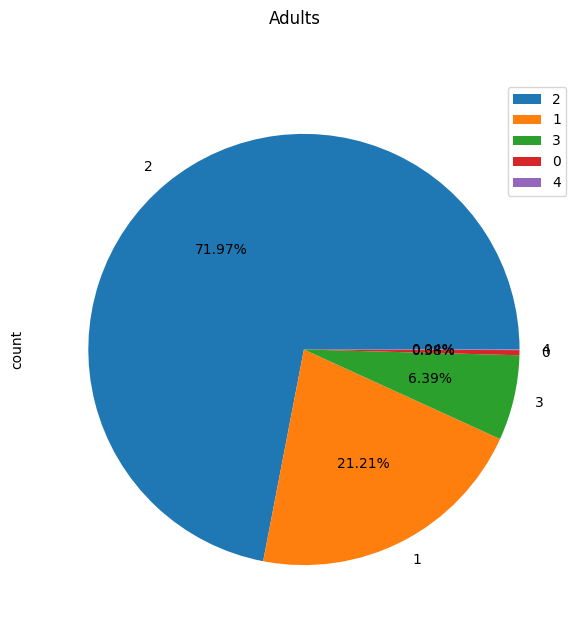

In [174]:
# 주로 1~2명의 성인이 가는 곳
df.groupby('no_of_adults')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Adults',figsize=(7,7))

array([<AxesSubplot: ylabel='count'>], dtype=object)

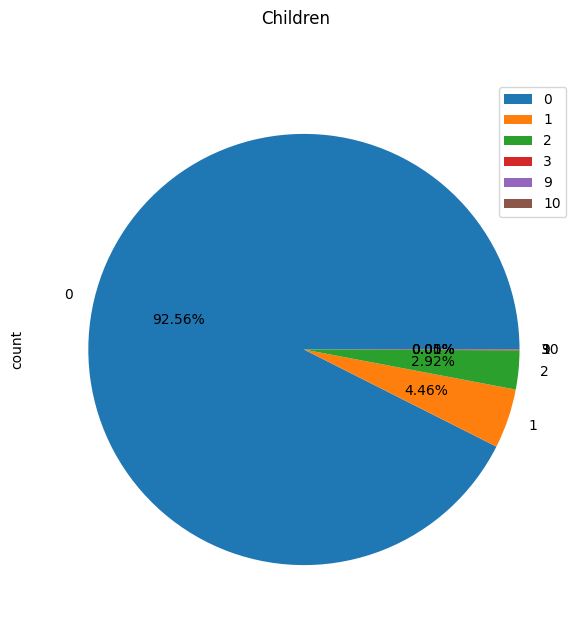

In [173]:
# 애들은 거의 데려가지 않는 호텔
df.groupby('no_of_children')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Children',figsize=(7,7))

<AxesSubplot: xlabel='family', ylabel='no_of_special_requests'>

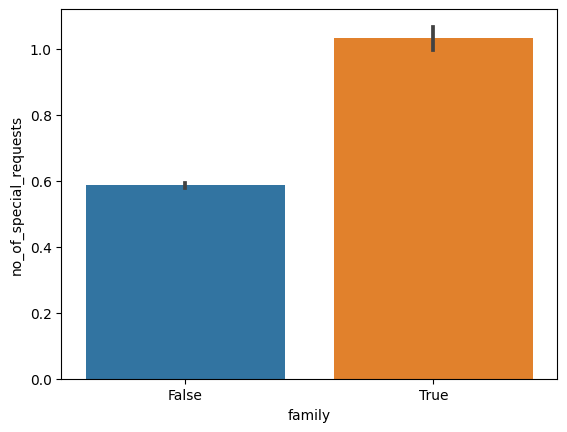

In [155]:
# 가족 손님일수록(애들이 있을수록) 평균 요구사항이 많을 것이다.
sns.barplot(data=df, x="family", y="no_of_special_requests")

<AxesSubplot: xlabel='family', ylabel='lead_time'>

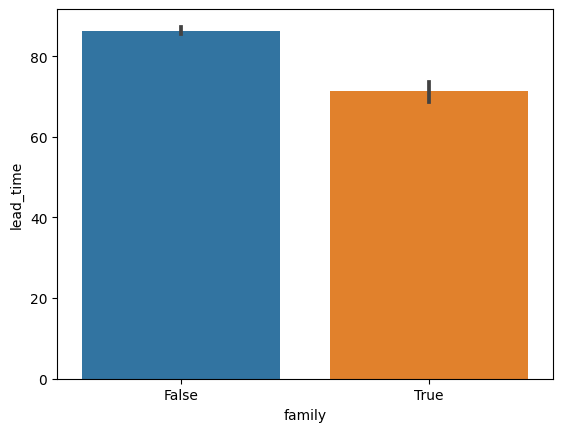

In [156]:
# 가족 손님일수록(애들이 있을수록) 예약을 더 일찍 잡을 것이다.
sns.barplot(data=df, x="family", y="lead_time")

<AxesSubplot: xlabel='family', ylabel='repeated_guest'>

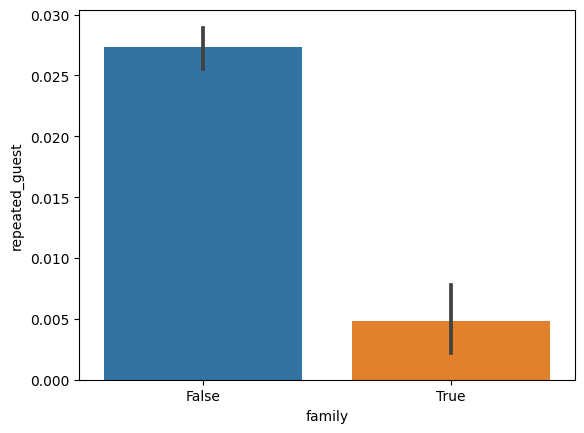

In [157]:
# 가족 손님일수록(애들이 있을수록) 재방문율이 높을 것이다.
sns.barplot(data=df, x="family", y="repeated_guest")

<AxesSubplot: xlabel='market_segment_type', ylabel='avg_price_per_room'>

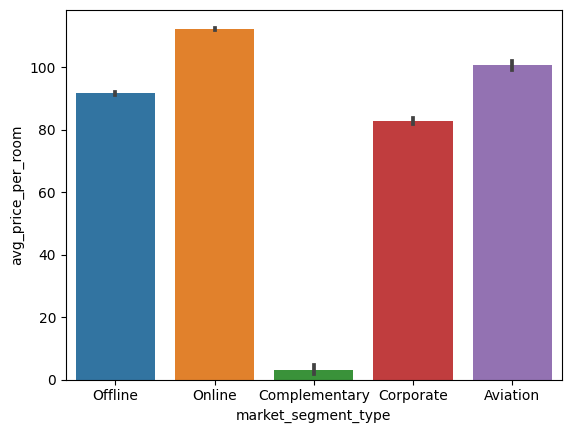

In [158]:
# market_segment_type 별 하루 평균 숙박 비용
sns.barplot(data=df, x="market_segment_type", y="avg_price_per_room")

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

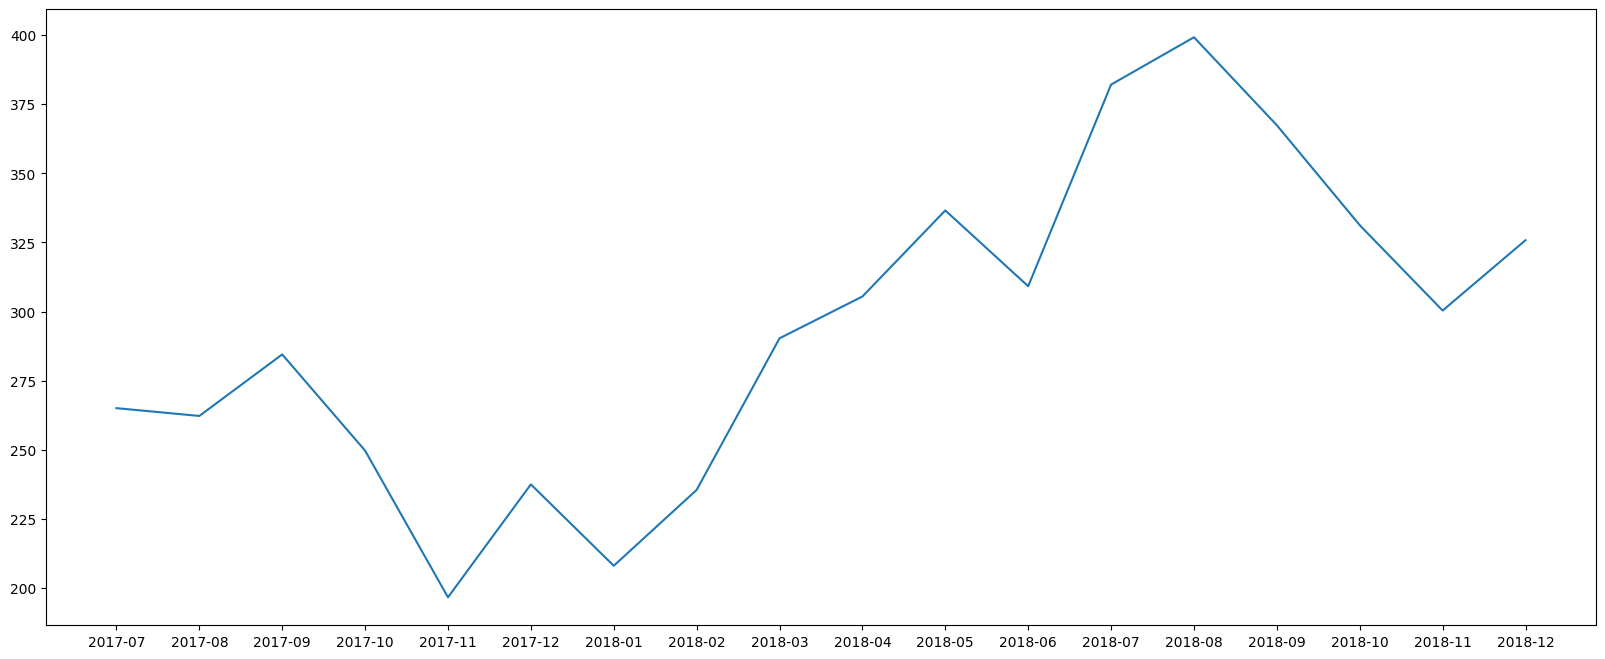

In [168]:
# 가을마다 큰 drop
plt.figure(figsize=(20, 8))
sns.lineplot(df, x="year_month", y="payment")